# Table of Contents

>[Table of Contents](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=r3_HX9gdUrcy)

>[Income Classification Problem](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=D85_VX0wOur8)

>>>[Attribute information:](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=D85_VX0wOur8)

>>>[Loading training and the testing data and some data cleaning](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=D85_VX0wOur8)

>>>[Some statistics and insights into data](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=VzkPWcDuQzAp)

>>>[Some more data pre-processing](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=ura2zX6hSSeh)

>>>[Building Classification Algorithms](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=rEianckESmKZ)

>>>>[Logistic regression](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=4surG99-SvPv)

>>>>>[A function to plot the confusion matrix](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=qAmgYlDVS45p)

>>>>[Logistic regression model with LASSO-type penalisation (L1)](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=gB_9Q_gwTFYk)

>>>>[Ensemble of Decision Trees Classifier (Extreme Gradient Boosting Classifier)](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=N2lJ4M_ITRSq)

>>>>[Cross-validation of the tree based model using 5-fold](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=zKWTqZi8TZUy)

>>>[Conclusion based on the 5-fold cross-validation](#updateTitle=true&folderId=1I6abHxBfYUvjHkeR_NTOIAxOrl74iEy2&scrollTo=yZM1tjYWTkp3)



# Income Classification Problem

We use the Adult income data set, which we can get from here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

We first create some summary charts and tables to explore the data. This is followed by  fitting a classification model to the data. Here we are trying to predict whether an individual earns more or less than $50k. We present the classification error rate and the confusion matrix.  Then we fit several other classification models to the data and check their performance compared to the first model. 

### Attribute information:

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Loading training and the testing data and some data cleaning


In [1]:
import pandas as pd 
import numpy as np

# all columns of the adult data
columns = ['age', 'workclass', 'fnlwgt','education','education-num','marital-status','occupation',
           'relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','income']

# read the training file
adult_train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=columns, 
                      sep=',\s', na_values=["?"], index_col=False)

# read the test file 
adult_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', names=columns, 
                      sep=',\s', na_values=["?"],skiprows=[0], index_col=False)

print(adult_train.shape)
print(adult_test.shape)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


(32561, 15)
(16281, 15)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [2]:
# Lets check which columns contain the missing values and how many
print adult_train.apply(lambda x: sum(x.isna()))
print adult_test.apply(lambda x: sum(x.isna()))

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [3]:
# for somplicity we drop the NaN values this time 
adult_train = adult_train.dropna(axis = 0)
adult_test = adult_test.dropna(axis = 0)

print adult_train.shape
print adult_test.shape

(30162, 15)
(15060, 15)


> I have dropped observations with missing values here only because this is a fairly big data set. However, in a general setting missing values can be easily imputed based on mean, median or model of the column.

### Some statistics and insights into data

In [4]:
# some summary statistics of the numeric columns

print "some descriptive statistics are given as follows: \n"
print adult_train.describe()
print "\n"
print "The correlation structure between the numeric variables are given below: \n"
print adult_train.corr()

some descriptive statistics are given as follows: 

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  30162.000000  3.016200e+04   30162.000000  30162.000000  30162.000000   
mean      38.437902  1.897938e+05      10.121312   1092.007858     88.372489   
std       13.134665  1.056530e+05       2.549995   7406.346497    404.298370   
min       17.000000  1.376900e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.176272e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.784250e+05      10.000000      0.000000      0.000000   
75%       47.000000  2.376285e+05      13.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    30162.000000  
mean        40.931238  
std         11.979984  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


The corre

>From the above summary statistics it is clear that the correlation structure among the quantitative variables is fairly week in this case. No two variables shows strong linear relationship among themselves.

In [0]:
import matplotlib.pyplot as plt

def stacked_plot(data, ind_var, dep_var):
  """
  Function to output the stacked plot of two categorical varaibles. 
  
  Input :
  -------------------
  data : a pandas data frame 
  ind_var : first categorical variable in the string format 
  dep_var : second categorical variable in the sttring format 
  
  Output :
  -------------------
  Simply plots the stacked bar chart of the categorical variables 
  """
  # create a cross-table of the two categorical variables consisting of 
  # percentage of observations that belong to the pair of categories 
  table = pd.crosstab(index=data[ind_var], columns = data[dep_var]).apply(lambda r: r/r.sum(), axis=1)
  
  # plot this cross-table as a stacked  bar graph 
  table.plot(kind='bar', figsize=(10,4), stacked = True,alpha=0.8)
  title = 'Stacked bar plot of ' + dep_var + ' versus '+ ind_var 
  plt.title(title, loc = 'center')
  plt.ylabel('Percentage')
  plt.legend(loc=3, bbox_to_anchor=(0., 1.02, 1., .102) ,ncol=2, mode="expand", borderaxespad=0.)

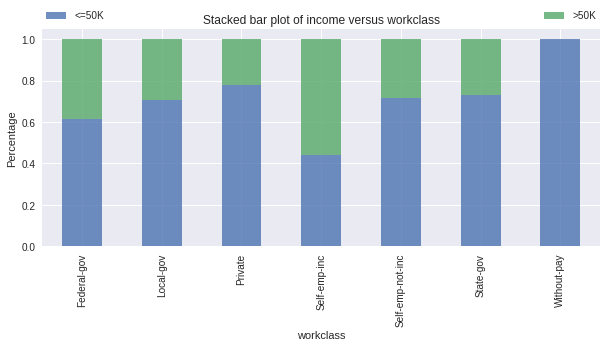

In [6]:
stacked_plot(adult_train, 'workclass','income')

1. From the above plot we can observe that there is a large proportion of the Self Employed People who earn more than 50K.
2. At the same time bigger proportion of the Federal Government, Local Government, Private State governemnt employees earn less than 50K.

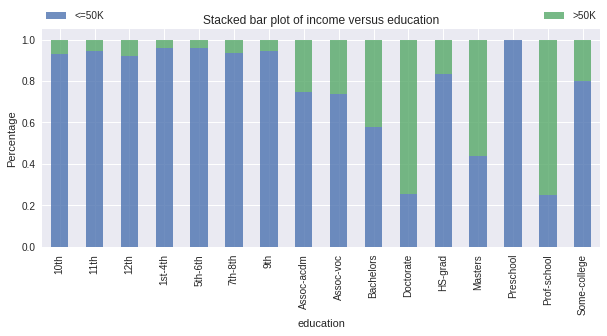

In [7]:
stacked_plot(adult_train, 'education','income')

1. From the above plot it can be observed that the extremely large proportion of the people who have not attended the university earn less than 50K. 

2. Also, as the years of education gets higher and higher the proportion of people earning more than 50K increases.

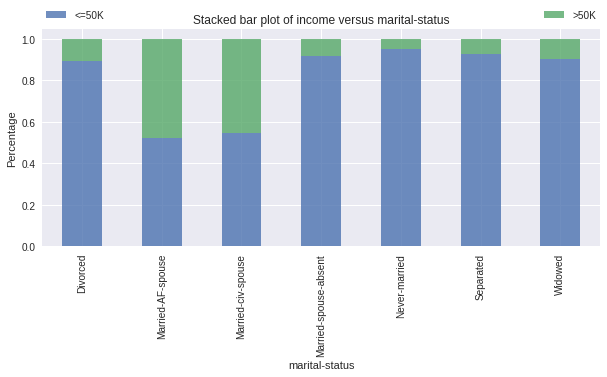

In [8]:
stacked_plot(adult_train, 'marital-status','income')

1. Interestingly very small proportion of divorced, windowed, separated, never married people earn greater than 50K.

2. At the same time nearly 50% of Married-AF-Spouse and Married-civ-spouse earn more than 50K.

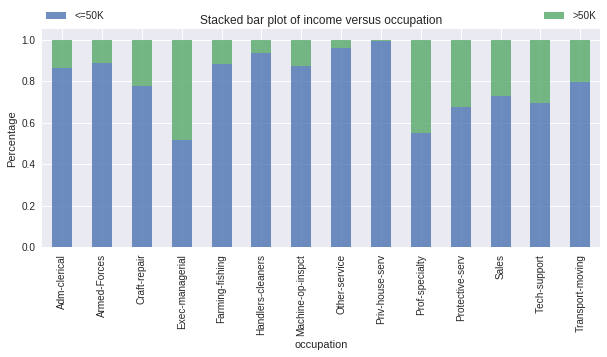

In [9]:
stacked_plot(adult_train, 'occupation','income')

1. Larger proportion of executive managerial people and professors earn more than 50K while very small proportion of people belonging to farming, cleaning, machine handling, admin and Arm forces earn more than 50K.

2. There is significant proportion of people in sales, technology and transport who earn more than 50K.

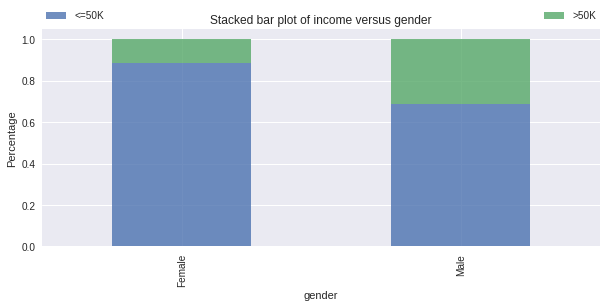

In [10]:
stacked_plot(adult_train, 'gender','income')

1. Men seems to be earning significantly more than women, of pay more than 50K. 
2. There is a bigger proportion of female who earn less than 50K than the male.

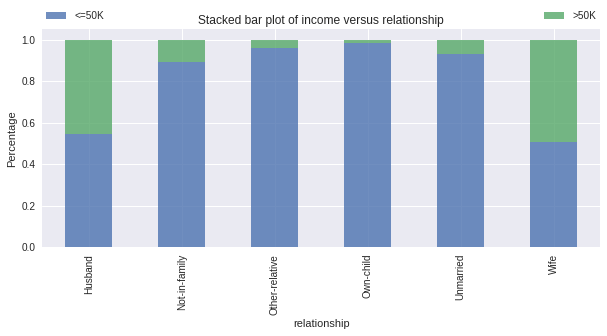

In [11]:
stacked_plot(adult_train, 'relationship','income')

1. Roughly 50% of the people earn more than 50K who call themselves as husbands and wives. 

2. A very small proportion of people who are not in a family or are unmarried earn more than 50K.

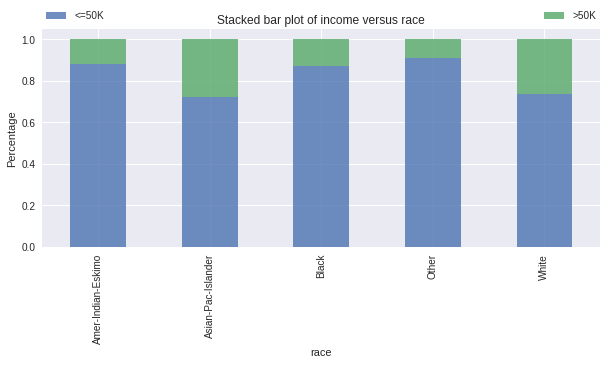

In [12]:
stacked_plot(adult_train, 'race','income')

1. Significanly larger proportion of Asian and White peole earn more than 50K than other races. 

2. Relatively very small fraction of the Black and Other races earn more than 50K.

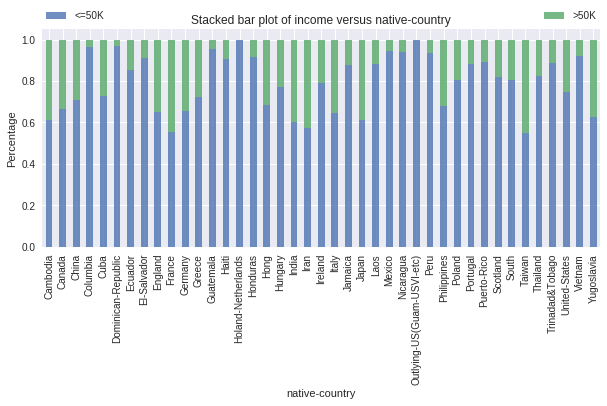

In [13]:
stacked_plot(adult_train, 'native-country','income')

1. Interestingly, a larger proportion of people from France, India, Iran and Taiwan earn more than 50K. 

2. Some countried like Columbia, Dominican Republic, Holland, Mexico and Nicaragua have very small proportion of peole who earn more than 50K.

/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


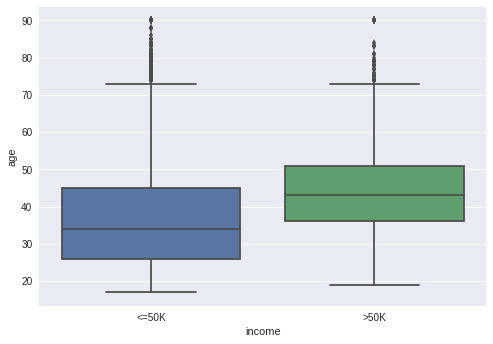

In [14]:
import seaborn as sns 

sns.boxplot(x = 'income', y = 'age', data=adult_train)

> From the above plot it is evident that relatively older peole tend to earn more than 50K. This is due to the fact that the median age of pople earning less than 50K is less than the median age of peole earning more than 50K.

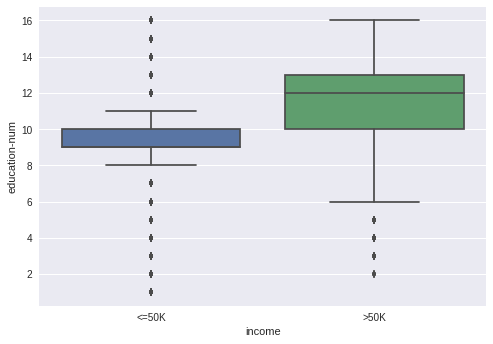

In [15]:
sns.boxplot(x = 'income', y = 'education-num', data=adult_train)

> As expected, the median age of people earning more than 50K is larger than the median age of people earning less than 50K. We should expect people with more years to education to earn more than people with less years of education.

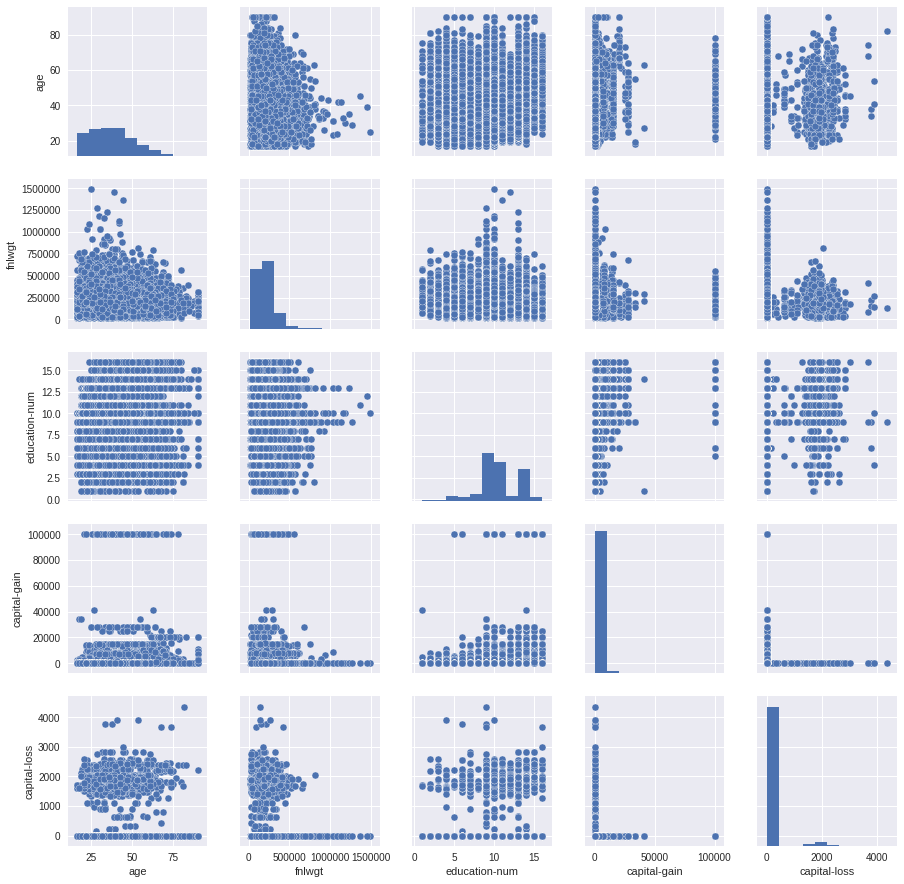

In [16]:
import seaborn as sns
sns.pairplot(adult_train[['age','fnlwgt','education-num','capital-gain','capital-loss']])

From the above pairplot of the numeric variables we can observe that :

1. No two pairs of the numeric variables shows strong dependence among themselves.

2. Age, fnlwgt and capital-gain variables are skewed to the right while education-num is skewed to the left. 

### Some more data pre-processing

In [17]:
# Lets check the unique values of 
print adult_train.apply(lambda x: len(x.unique()))
print adult_test.apply(lambda x: len(x.unique()))

age                  72
workclass             7
fnlwgt            20263
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
gender                2
capital-gain        118
capital-loss         90
hours-per-week       94
native-country       41
income                2
dtype: int64
age                  73
workclass             7
fnlwgt            11913
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
gender                2
capital-gain        110
capital-loss         79
hours-per-week       89
native-country       40
income                2
dtype: int64


> From the above result it can be observed that the native-country in the train set has one extra level than the test set. From the analysis below it is clear that 'Holand-Netherlands' is not present in the test set.

In [18]:
# print unique country levels in the training set 
print (adult_train['native-country'].unique()) , '\n'

# print unique country levels in the set set 
print (adult_test['native-country'].unique()), '\n'

# lets check what levels of the native country variable are not present in the test set 
set(adult_train['native-country'].unique()).difference(set(adult_test['native-country'].unique()))

['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands'] 

['United-States' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France'] 



{'Holand-Netherlands'}

In [19]:
# meger the train and the test data set 
adult_full = pd.concat([adult_train,adult_test])

# print the dimensions of the three data sets just for checking 
print adult_train.shape
print adult_test.shape
print adult_full.shape

(30162, 15)
(15060, 15)
(45222, 15)


In [20]:
# print the unique levels of the income variable 
print adult_full.income.unique()

# looks like the test set levels has been corrupted by a dot 
# therefore we recode them and then replace then my 0 and 1 in the merged data

encode = {'<=50K':0, '>50K':1, '<=50K.':0, '>50K.':1}

# Lets replace level code by 0 and 1 in the full data set
adult_full =  adult_full.replace(encode)

print adult_full.income.unique()

['<=50K' '>50K' '<=50K.' '>50K.']
[0 1]


### Building Classification Algorithms

In [0]:
# change the categorical columns to binary using dummy variable (often called one-hot encoding) 

one_hot_columns = ['workclass','education','marital-status','occupation','relationship','race','gender','native-country']

adult_full_oh = pd.get_dummies(adult_full, columns =  one_hot_columns, drop_first=True)

In [22]:
# lets re-divide the full dataset according to the shape of the 
# old trainning and test set
adult_train_new = adult_full_oh.iloc[:len(adult_train)]
adult_test_new = adult_full_oh.iloc[len(adult_train):]

# print the shape of new train and old train dataset 
print len(adult_train_new)
print len(adult_train)

30162
30162


In [0]:
# set the independent and dependent variables

dep_var = 'income'

ind_var = [x for x in adult_train_new.columns if x not in [dep_var]]

#### Logistic regression 

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept = True, C = 1e9).fit( adult_train_new[ind_var],adult_train_new[dep_var])

##### A function to plot the confusion matrix 

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, xticks = ['<=50K', '>50K']):
  """
  Function to plot the confusion matrix of a binary classification model
  Input :
  -------------------------
  y_true - true y labels 
  y_pred - predicted y labels 
  
  Output :
  -------------------------
  Simply plots the confusion matrix of a binary classification problem
  """
  # create the confusion matrix of the true and predicted labels 
  cm = confusion_matrix(y_true, y_pred)
  # convert them to a data frame 
  df_cm = pd.DataFrame(cm, range(2), range(2))
  # plot the confusion matrix of the above classification model as a heatmap
  sns.set(font_scale=1.4) 
  ax = sns.heatmap(df_cm, annot=True, fmt='g',annot_kws={"size": 16}, 
              xticklabels = xticks, yticklabels=xticks).set_title('Plot of the confusion matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

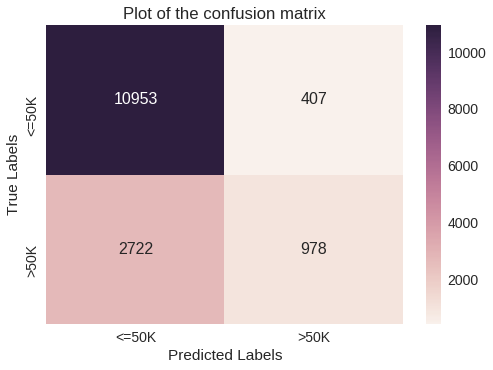

In [26]:
# predictions on the test set 

predictions = model.predict(adult_test_new[ind_var])

#plot the confusion matrix

plot_confusion_matrix(adult_test_new[dep_var], predictions)

In [27]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(adult_test_new[dep_var], predictions)

print 'The error rate is ', 1- accuracy

The error rate is  0.20776892430278882


> I chose the most basic classification algorithm namely logistic regression model, this is mainly due to its simplicity. This model classifies nearly 80% of the labels correctly. Therefore, in order to increase the accuracy of this model I would consider another model in the following section.

#### Logistic regression model with LASSO-type penalisation (L1)

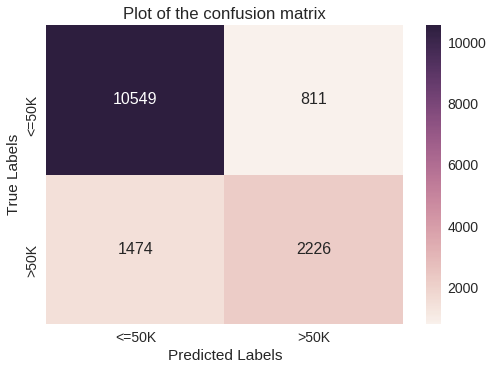

The error rate is  0.15172642762284194


In [28]:
model = LogisticRegression(fit_intercept = True, penalty='l1', C = 1).fit( adult_train_new[ind_var],adult_train_new[dep_var])

# predictions on the test set 

predictions = model.predict(adult_test_new[ind_var])

plot_confusion_matrix(adult_test_new[dep_var], predictions)

accuracy = accuracy_score(adult_test_new[dep_var], predictions)

print 'The error rate is ', 1- accuracy

Logistic regression with LASSO type penalisation does better than non-regularized logistic regression. The error rate has gone down by almost 5% by including a L1 type regularization. The reason why I considered this model is as follows:
1. L1 type of regularization is known for its automatic feature selection therefore it tends to discard less important feature. 

2. I did consider L2 type penalization but it does not do better than L1 type penalization. 


#### Ensemble of Decision Trees Classifier (Extreme Gradient Boosting Classifier)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


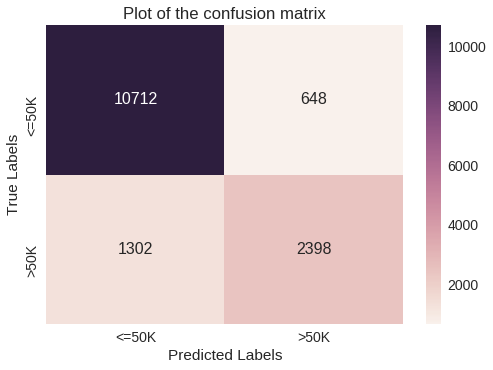

The error rate is  0.1294820717131474


In [29]:
from xgboost import XGBClassifier


# Inititate the algorithm and set the parameters, these are based on my own experience 

xgb_params0={'colsample_bytree': 0.87, 'silent': 1, 'nthread': 8, 'min_child_weight': 10,\
    'n_estimators': 1000, 'subsample': 1, 'learning_rate': 0.01, 'objective': 'reg:logistic',\
    'seed': 10, 'max_depth': 7, 'gamma': 0.0, 'eval_metric' : 'error'}

model = XGBClassifier(**xgb_params0)

model.fit(adult_train_new[ind_var],adult_train_new[dep_var])

predictions = model.predict(adult_test_new[ind_var])

plot_confusion_matrix(adult_test_new[dep_var], predictions)

accuracy = accuracy_score(adult_test_new[dep_var], predictions)

print 'The error rate is ', 1- accuracy

> Extreme gradient boosting gives the minimal error rate so far which is roughly 13% resulting into 87% of accuracy on the test set. Finally, we cross-validate our final model to check if there is any overfitting.

#### Cross-validation of the tree based model using 5-fold 

In [30]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline

# we make a pipeline of the above three classifiers
clf = make_pipeline(XGBClassifier(**xgb_params0))

scores = cross_val_score(clf, adult_train_new[ind_var],adult_train_new[dep_var], cv=5)

print("Average Error Rate: %.2f%% (+/- %.2f%%)" % ((1-scores).mean()*100, (1-scores).std()*100))

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

Average Error Rate: 13.21% (+/- 0.30%)


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Conclusion based on the 5-fold cross-validation

> Based on our empirical study on error rate of the Logistic regression model and the Penalised logistic Regression model it is evident that our tree based model is the best among all. Upon using 5-fold cross-validation for the decision tree based model, the average error rate is roughly 13% which beats both versions of the logistic regression model. I did not think it is useful to cross-validate earlier two versions of the logistic regression model since the average error rate in the cross-validated extreme gradient boosting model is roughly 13% with a standard deviation of 0.3%. Therefore none of the above two models can beat the accuracy of the extreme gradient model.